In [1]:
import matplotlib.pyplot as plt
import sympy
from IPython.core.display import Math
import numpy as np
import sympy
import pandas as pd
from scipy import interpolate
from Splines.CubicSplines import cubic_spline_functions, spline_to_latex, plot_splines, evaluate_spline


# 17.5
Given Data
| x | 1 | 2 |  3 |  5 | 6 |
|---|---|-----|-----|-----|-----|
| f(x) |4.75| 4 | 5.25 | 19.75 | 36 |

Calculate $f(4)$ using Newton’s interpolating polynomials of
order 1 through 4. Choose your base points to attain good
accuracy. That is, the points should be centered around and
as close as possible to the unknown. What do your results
indicate regarding the order of the polynomial used to gener-
ate the data in the table?

In [2]:
from Interpolation.NetwtonInterpolationPolynomial import newton_interpolation_polynomial

p_17_5_data = dict(
    x=np.array([1,2,3,5,6]),
    y=np.array([4.75, 4 , 5.25 , 19.75 , 36 ]),
)
for order in range(1,5):
    print(f'Newton interpolation polynomial order {order}:')
    fx = newton_interpolation_polynomial(p_17_5_data['x'], p_17_5_data['y'], order=order)
    display(Math(f'f(x)={sympy.latex(fx)}'))
    display(Math(f'f(4) = {fx.subs({'x':4})}'))

Newton interpolation polynomial order 1:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Newton interpolation polynomial order 2:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Newton interpolation polynomial order 3:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Newton interpolation polynomial order 4:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
from Interpolation.NetwtonInterpolationPolynomial import lagrange_interpolation_polynomial

fx = lagrange_interpolation_polynomial(p_17_5_data['x'][:-1], p_17_5_data['y'][:-1])
display(Math(f'f(x)={sympy.latex(fx)}'))
display(Math(f'f(4)={fx.subs({'x':4})}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 17.6
Repeat Prob. 17.5 using the Lagrange polynomial of
order 1 through 3.

# 18.1
Given Data
| x | 1 | 2 | 2.5 | 3 | 4 | 5 |
|---|---|-----|-----|-----|-----|-----|
| f(x) |1| 5 | 7 | 8 | 2 | 1 |

Fit these data with (a) a cubic spline with natural end condi-
tions, (b) a cubic spline with not-a-knot end conditions, and
(c) piecewise cubic Hermite interpolation.

In [4]:
p_18_1_data = dict(
    x=np.array([1 ,2 , 2.5 , 3 , 4 , 5 ]),
    y=np.array([1, 5 , 7 , 8 , 2 , 1]),
)


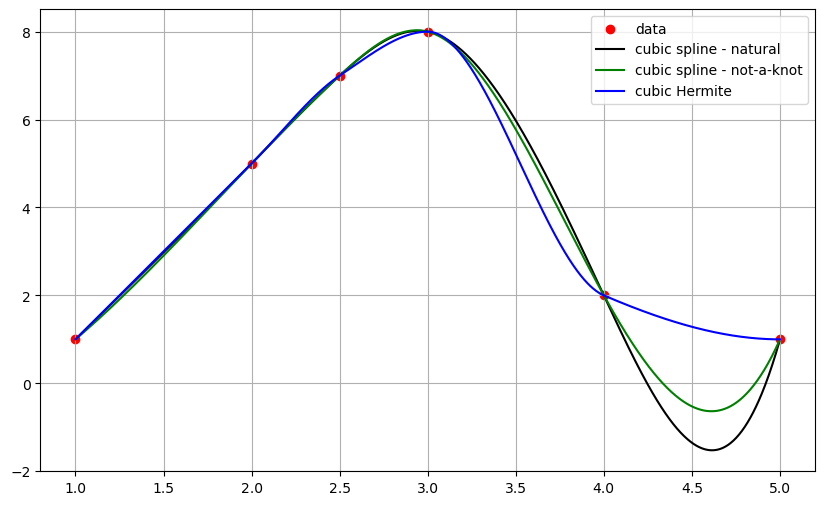

In [5]:
p_18_1_a_spline = cubic_spline_functions(p_18_1_data['x'], p_18_1_data['y'], end_condition='natural')
p_18_1_b_spline = cubic_spline_functions(p_18_1_data['x'], p_18_1_data['y'], end_condition='not-a-knot')

p_18_1_x = np.linspace(p_18_1_data['x'].min(), p_18_1_data['x'].max(), 1000)
p_18_1_a_y = evaluate_spline(p_18_1_a_spline, p_18_1_x)
p_18_1_b_y = evaluate_spline(p_18_1_b_spline, p_18_1_x)
p_18_1_c_y = interpolate.PchipInterpolator(p_18_1_data['x'], p_18_1_data['y'])(p_18_1_x)

plt.figure(figsize=(10, 6))
plt.scatter(p_18_1_data['x'], p_18_1_data['y'], color='red', label='data')
plt.plot(p_18_1_x, p_18_1_a_y, color='black', label='cubic spline - natural')
plt.plot(p_18_1_x, p_18_1_b_y, color='green', label='cubic spline - not-a-knot')
plt.plot(p_18_1_x, p_18_1_c_y, color='blue', label='cubic Hermite')

plt.grid(True)
plt.legend()

# 18.3

18.3 The following is the built-in humps function that MATLAB
uses to demonstrate some of its numerical capabilities:

$$ f(x) = \frac{1}{(x-0.3)^2+0.01} + \frac{1}{(x-0.9)^2+0.04} - 6$$

The humps function exhibits both flat and steep regions over a
relatively short x range. Here are some values that have been
generated at intervals of 0.1 over the range from x = 0 to 1:


| x | 0 | 0.1 | 0.2 | 0.3 | 0.4 | 0.5 | 0.6 | 0.7 | 0.8 | 0.9 | 1 |
|---|---|-----|-----|-----|-----|-----|-----|-----|-----|-----|---|
| f(x) | 5.176 | 15.471 | 45.887 | 96.500 | 47.448 | 19.000 | 11.692 | 12.382 | 17.846 | 21.703 | 16.000 |

Fit these data with a
 - cubic spline with not-a-knot end
conditions
  - piecewise cubic Hermite interpolation.


In both cases, create a plot comparing the fit with the exact humps function.

In [6]:
p_18_3_data = dict(
    x=np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
    y=np.array([5.176 , 15.471 , 45.887 , 96.500 , 47.448 , 19.000 , 11.692 , 12.382 , 17.846 , 21.703 , 16.000 ])
)

In [7]:
p_18_3_a_spline = cubic_spline_functions(p_18_3_data['x'], p_18_3_data['y'], end_condition='not-a-knot')
display(Math(spline_to_latex(p_18_3_a_spline)))

<IPython.core.display.Math object>

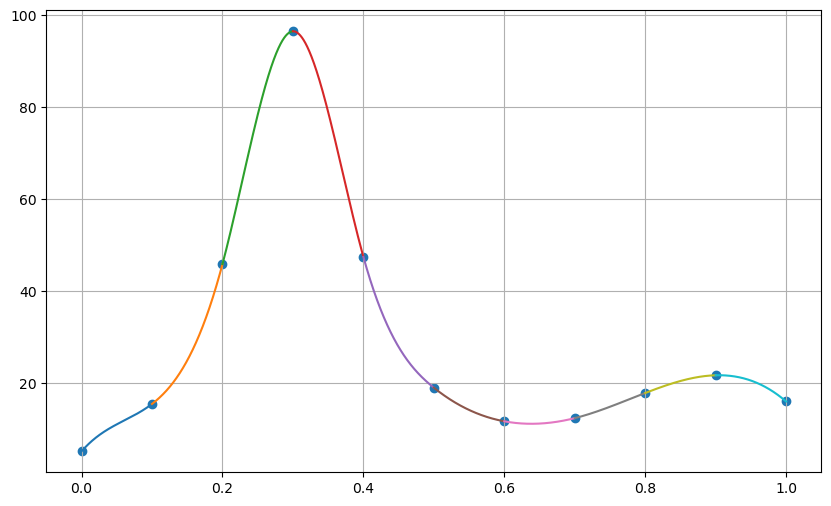

In [8]:
ax = plot_splines(p_18_3_a_spline)
plt.scatter(p_18_3_data['x'], p_18_3_data['y'])
plt.grid()

In [9]:
p_18_3_data['x'].shape

(11,)

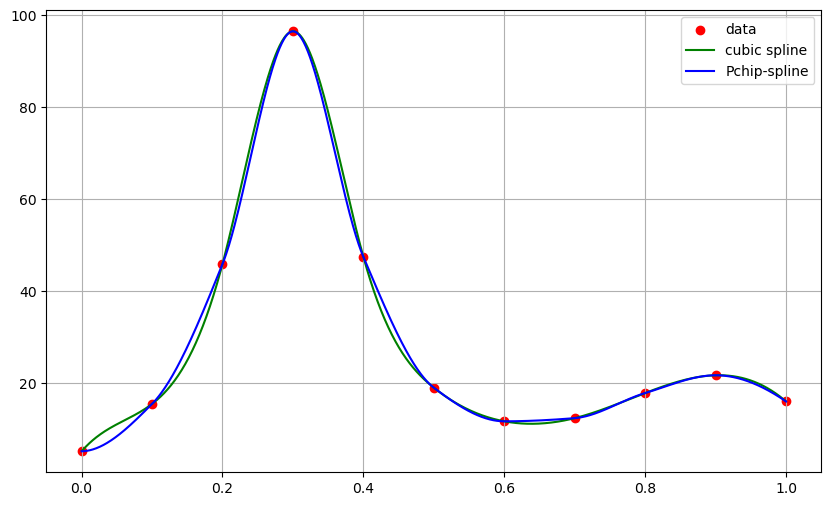

In [10]:
p_18_3_x = np.linspace(p_18_3_data['x'].min(), p_18_3_data['x'].max(), 1000)
p_18_3_a_y = evaluate_spline(p_18_3_a_spline, p_18_3_x)
p_18_3_b_y = interpolate.PchipInterpolator(p_18_3_data['x'], p_18_3_data['y'])(p_18_3_x)

plt.figure(figsize=(10, 6))
plt.scatter(p_18_3_data['x'], p_18_3_data['y'], color='red' , label='data')
plt.plot(p_18_3_x, p_18_3_a_y, color='green', label='cubic spline')
plt.plot(p_18_3_x, p_18_3_b_y, color='blue' , label='Pchip-spline')
plt.legend()
plt.grid()